# Analysis for data from 2017-12-30

### Settings, imports, data

In [95]:
%matplotlib inline
from collections import OrderedDict
from IPython.display import display, Markdown
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import learn
from monitoring.data import get_production_data

sns.set()

In [96]:
# Load data from local cache, fetch and store if not available.
data = get_production_data('2017-12-30')

Data loaded from cache (/home/xeffenb1/projects/robomission/backend/monitoring/.data/robomission-2017-12-30/).


# All task sessions

### Histogram of log-times

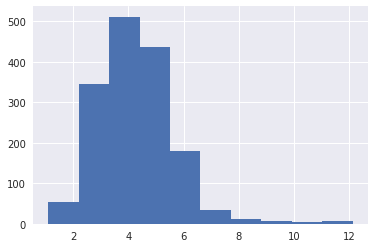

In [97]:
ts = data['task_sessions']
ts.time_spent[d.time_spent > 0].apply(np.log).hist()

# All tasks

In [98]:
ts = data['task_sessions']
grouped_ts = ts.groupby('task')
metrics = pd.DataFrame(OrderedDict(
    time=grouped_ts.time_spent.median(),
    success=grouped_ts.solved.mean(),
    n_attempts=grouped_ts.task.count(),
    n_solved=grouped_ts.solved.sum(),
))
tasks = data['tasks'].join(metrics)

### Solved counts and attempts distribution

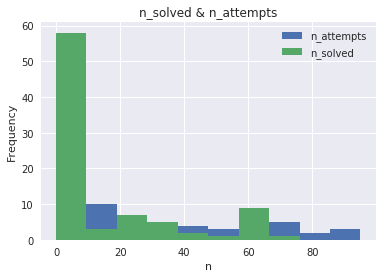

In [99]:
ax = tasks[['n_attempts', 'n_solved']].plot.hist(
    title='n_solved & n_attempts')
ax = ax.set_xlabel('n')

### Success rate distribution

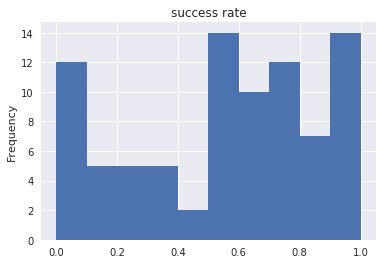

In [100]:
ax = tasks.success.plot.hist(title='success rate')

### Median time distribution

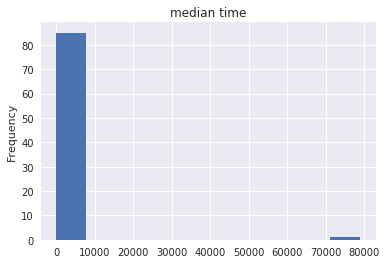

In [101]:
ax = tasks.time.plot.hist(title='median time')

### Median Time vs Success Rate

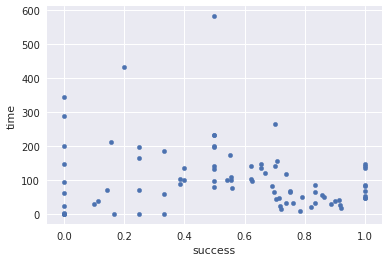

In [102]:
#tasks.plot.scatter(x='success', y='time')
tasks[tasks.time < 3600].plot.scatter(x='success', y='time')

# Levels Overview

In [103]:
grouped_tasks = tasks.groupby('level')
metrics = pd.DataFrame(OrderedDict(
    time=grouped_tasks.time.median(), # median of medians
    success=grouped_tasks.success.mean(),
    n_attempts=grouped_tasks.n_attempts.sum(),
    n_solved=grouped_tasks.n_solved.sum(),
))
levels = data['levels'].merge(metrics, left_on='name', right_index=True)
levels[['name', 'n_attempts', 'success', 'time']]

,name,n_attempts,success,time
id,,,,
1,moves,667,0.781711,31.00
2,world,386,0.758804,99.00
3,repeat,313,0.789231,84.00
4,while,157,0.774644,64.00
5,loops,116,0.654476,97.50
6,if,41,0.146599,148.00
7,comparing,25,0.377778,99.00
8,if-else,21,0.380952,79.50
9,final-challenge,81,0.281143,115.25


# Tasks in Levels

# moves

,name,n_attempts,success,time
id,,,,
2,turning-left-and-right,95,0.736842,33.0
14,beware-of-asteroid,71,0.915493,42.0
25,three-steps-forward,86,0.720930,14.5
26,turning-right-and-left,67,0.761194,32.0
31,diamond-on-right,81,0.703704,43.0
86,diamond-path,6,0.833333,31.0
44,turning-left,89,0.719101,22.0
49,turning-right,73,0.821918,21.0
51,one-step-forward,83,0.783133,10.0


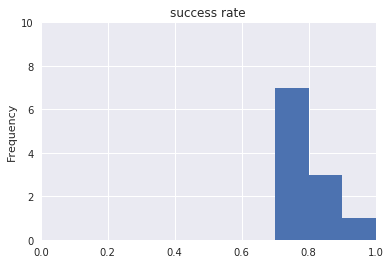

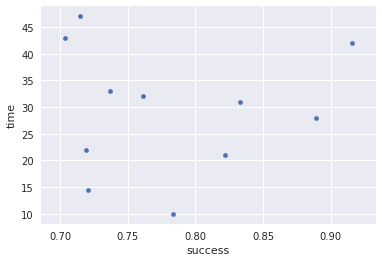

-----

# world

,name,n_attempts,success,time
id,,,,
6,tunnel,62,0.709677,157.0
8,shooting,70,0.900000,37.5
10,shot,63,0.920635,16.0
12,wormhole-demo,72,0.916667,26.0
19,2diamonds-2meteorids,55,0.654545,136.0
23,dont-forget-shot,55,0.654545,146.0
79,last-shot,9,0.555556,99.0


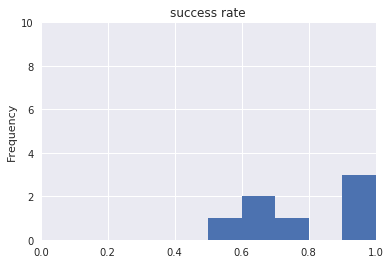

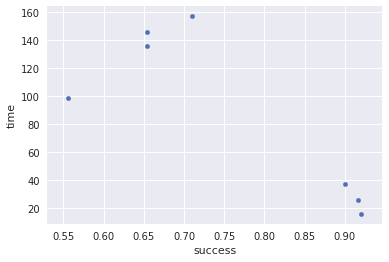

-----

# repeat

,name,n_attempts,success,time
id,,,,
13,n,42,0.738095,119.0
11,ladder,44,0.863636,50.5
21,steal-the-nose,50,0.700000,140.5
1,diamonds-in-meteoroid-cloud,36,0.833333,84.0
46,find-the-path,45,0.622222,103.0
57,stairs,37,0.621622,142.0
18,clean-your-path,38,0.552632,172.5
84,triangle,4,0.750000,66.0
70,big-right-turn,7,1.000000,67.0


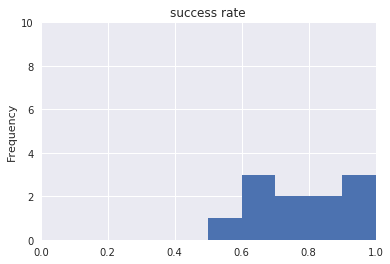

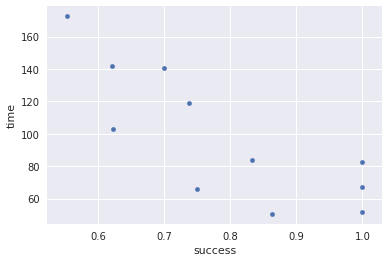

-----

# while

,name,n_attempts,success,time
id,,,,
3,zig-zag,33,0.696970,64.0
17,yellow-is-not-red,25,0.560000,75.0
38,direction-change,37,0.540541,100.0
41,yellow-hint,24,0.833333,63.5
53,direct-flight-ahead,24,0.791667,50.0
73,stop-on-red,6,1.000000,46.0
69,diamond-in-house,8,1.000000,134.5


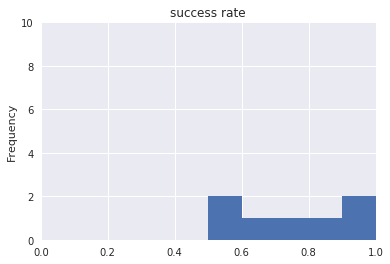

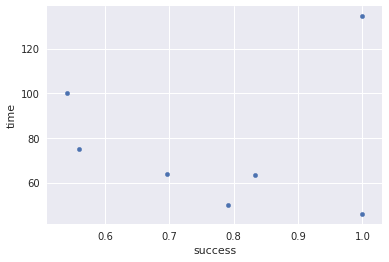

-----

# loops

,name,n_attempts,success,time
id,,,,
37,big-slalom,18,0.555556,107.5
47,arrow,13,0.384615,104.0
50,double-bend,13,0.692308,81.0
56,diamond-cross,14,0.857143,55.0
55,color-slalom,13,0.384615,88.0
58,collect-diamonds,8,0.625000,97.5
52,zig-zag-plus,10,0.700000,266.0
63,rectangle,5,1.000000,140.0
68,stripes,2,1.000000,85.5


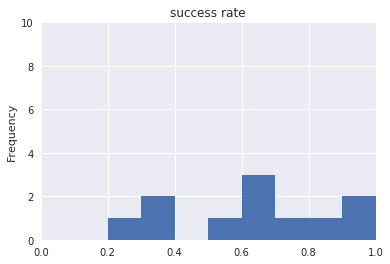

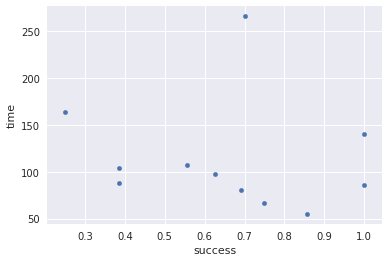

-----

# if

,name,n_attempts,success,time
id,,,,
5,diamonds-with-signals,8,0.250000,196.0
27,on-yellow-to-left,5,0.200000,434.0
59,two-diamonds,10,0.100000,30.0
60,red-shooting,7,0.142857,71.0
34,follow-colors,6,0.333333,60.0
78,yellow-squares,2,0.000000,288.5
81,belgian-flag,3,0.000000,148.0


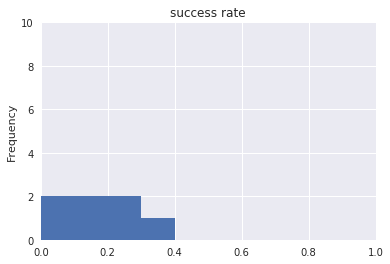

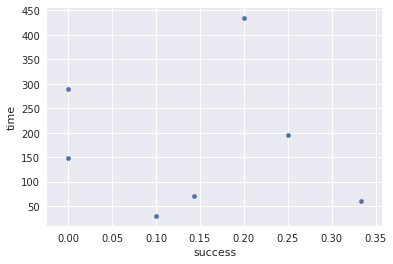

-----

# comparing

,name,n_attempts,success,time
id,,,,
9,diamond-lines,3,0.333333,0.0
28,slalom-position-testing,5,0.400000,99.0
85,chessboard,2,0.000000,95.0
48,edge-to-edge,6,0.500000,197.0
83,maneuvers-on-left,1,1.000000,48.0
64,wave,2,0.000000,0.0
7,meteoroids-and-wormholes,3,0.666667,121.0
65,letter-h,1,0.000000,346.0
82,free-column,2,0.500000,233.0


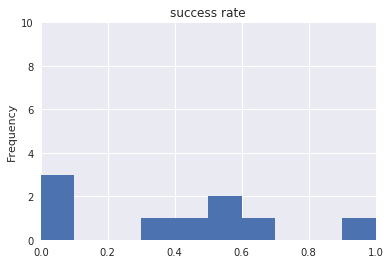

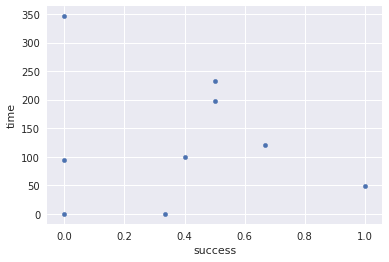

-----

# if-else

,name,n_attempts,success,time
id,,,,
75,bouncing-from-edge,2,0.500000,79.5
43,colorful-flowers,6,0.166667,0.0
16,diamonds-on-yellow,1,0.000000,199.0
22,triple-steps,2,0.500000,582.5
29,color-navigation,4,0.250000,0.0
24,narrow-passage,4,0.250000,71.5
80,letter-e,2,1.000000,147.5


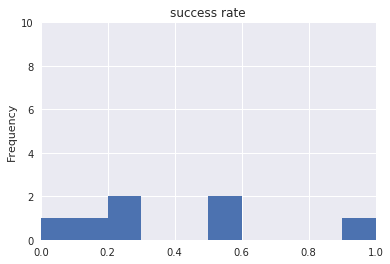

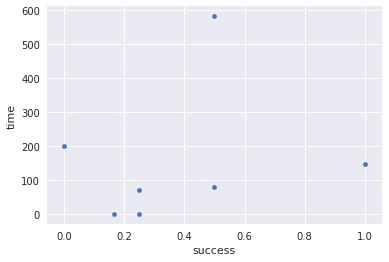

-----

# final-challenge

,name,n_attempts,success,time
id,,,,
4,triple-slalom,9,0.111111,39.0
15,wormhole-cloud,13,0.153846,212.0
42,two-color-tracks,3,0.333333,185.0
20,five-diamonds,5,0.400000,134.0
30,edge-wormholes,2,0.500000,200.0
35,six-diamonds,2,0.500000,140.5
36,cross-2,4,0.500000,97.0
40,plan-your-shooting,5,0.000000,61.0
54,diagonal-diamonds,2,0.500000,133.5


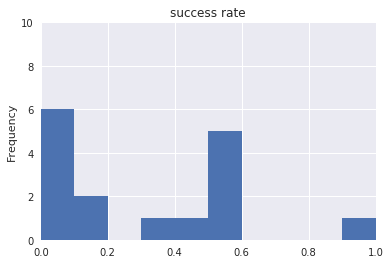

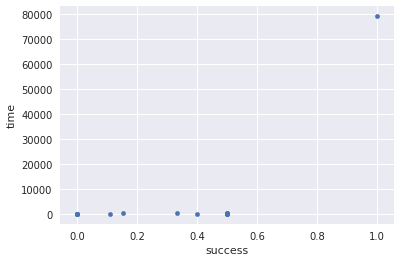

-----

In [107]:
def display_plot(ax):
    display(ax)
    plt.show()  # forcing to display here

def display_success_rate_hist(tasks):
    ax = tasks.success.plot.hist(
        bins=np.linspace(0, 1, 11),
        title='success rate')
    #plt.xticks(np.linspace(0, 1, 11))
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 10)
    #plt.yticks(range(10))
    display_plot(ax)
    
def analyze_level(name):
    ts = tasks[tasks.level == name]
    ts = ts[['name', 'n_attempts', 'success', 'time']]
    display(Markdown('# {name}'.format(name=name)))
    display(ts)
    display_success_rate_hist(ts)
    display_plot(ts.plot.scatter(x='success', y='time'))
    display(Markdown('-----'))

for name in levels.name:
    analyze_level(name)